In [1]:
import warnings; warnings.filterwarnings("ignore")

import sys
sys.path.append('..')
# from id_signaling.figures import load_minority_dfs, covert_vs_minority_frac, minority_diff_heatmap

from id_signaling.figures import minority_diff_heatmap, similarity_threshold

# Covert signaling in minority populations

Here we examine how covert signaling evolves under different minority/majority population scenarios. We have data for two different minority prevalences, $\rho^{minor}=0.1,0.2$. We also vary the similarity measure. 

To analyze this data I will make heatmaps for a variety of parameter combinations, and also plot the dependence of $\rho_{cov}^{minor/major}$ against the tolerance parameter. 

This will take some hacking of existing figure making functions, but should be doable with what currently exists.

The major issue is to pre-process the directory of minority-tolerance data to know which files files contain data run under different parameter settings. This is rather ugly, but a necessary consequence of not using a better file format like HDF for the outputs.

I will select out only the data for parameter settings I plan to use. We use $K=3,9$ and set the number of traits used to delineate minority and majority populations to be $M=K - \frac{K+1}{2}$, which will be 1 and 4 for the two $K$ values. We tested two values of minority prevalence in the population, $\rho^{minor}=0.1,0.2$. Finally, for each combination of $K$ and $\rho^{minor}$ we tested three similarity threshold values, $S=0.3,0.5,0.9$. These correspond to greater than 1/3, "1/2", and "all" traits required to be identical in order to consider two agents to be similar.     

We use odd number $K$ with the chosen values of $M$ so that it takes only one trait in common for ingroup (both minority or majority) dyads to be similar, always with the same probability $\frac{1}{2}$, but $\frac{K+1}{2}$ traits in common for outgroup dyads to be similar. The probability an outgroup dyad is similar, then, would be $2^{-(\frac{K+1}{2})}$: $\frac{1}{4}$ for $K=3$ and $\frac{1}{32}$ for $K=9$.

In [8]:
import csv
import re

from glob import glob

# First collect all part files containing experimental trials.
gs = glob('../data/minority/*/*.csv')

# Initialize a list to hold all collected blobs.
blobs = []
for g in gs:
    data = csv.reader(open(g, 'r'))
    header = next(data)
    first = next(data)
    blob = dict(list(zip(header, first))[:3])
    blob.update({'file': g})
    blob.update(dict(minority_frac = re.search(string=g, pattern='\d\.\d\d').group()))
    blobs.append(blob)
    
# Load dataframes for parameter combinations of interest.
# Parameters are strings because that's how they were read
# in the previous step.
Ks = ['3', '9']
minority_fracs = ['0.10', '0.20']

# I oversampled for K=3 and had S=0.5 fail for both minority fracs
# in K=3. For K=3, S=0.5 is equivalent to S=0.6 since both will be 
# surpassed when dyads share 2/3 traits.
Ss = {'3': ['0.3', '0.5', '0.8'],
      '9': ['0.3', '0.5', '0.8']}

# Iterate through all blobs and select out parameters of interest.
blobs_to_load = []
for K in Ks:
    for S in Ss[K]:
        for minority_frac in minority_fracs:
            blobs_to_load.append([
                b for b in blobs if 
                b['K'] == K and
                b['S'] == S and
                b['minority_frac'] == minority_frac
            ][0])
# XXX this seems problematic. Instead of taking the first one found it seems we now need to 
# track all matching blobs, not just the first. Then create a DF for each one and concatenate
# them all.

# Update blobs of interest with DataFrame version of data.
for b in blobs_to_load:
    print(f'loading file for {b}')
    b.update({'df': pd.read_csv(b['file'])})

loading file for {'K': '3', 'M': '1', 'S': '0.3', 'file': '../data/minority/0.10/part-5c8e87fc-ccf6-472d-9cf1-7712ac7e76f0.csv', 'minority_frac': '0.10'}
loading file for {'K': '3', 'M': '1', 'S': '0.3', 'file': '../data/minority/0.20/part-32906ce4-9d60-4b4d-b844-4389b4101c9b.csv', 'minority_frac': '0.20'}
loading file for {'K': '3', 'M': '1', 'S': '0.5', 'file': '../data/minority/0.10/part-5f2791d2-ebe9-4408-a7fd-db34805e5606.csv', 'minority_frac': '0.10'}
loading file for {'K': '3', 'M': '1', 'S': '0.5', 'file': '../data/minority/0.20/part-c4c0486e-b1b4-48b9-ad05-42fcef58d06b.csv', 'minority_frac': '0.20'}
loading file for {'K': '3', 'M': '1', 'S': '0.8', 'file': '../data/minority/0.10/part-cf1136fe-fd74-4d4b-a25e-2f1da299a8b1.csv', 'minority_frac': '0.10'}
loading file for {'K': '3', 'M': '1', 'S': '0.8', 'file': '../data/minority/0.20/part-d45efe71-6ea2-46e5-b4d5-7280841c7b52.csv', 'minority_frac': '0.20'}
loading file for {'K': '9', 'M': '4', 'S': '0.3', 'file': '../data/minority/

In [9]:
len(blobs_to_load)

12

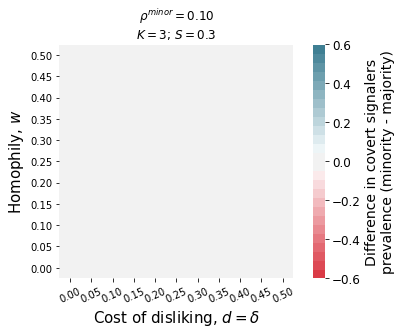

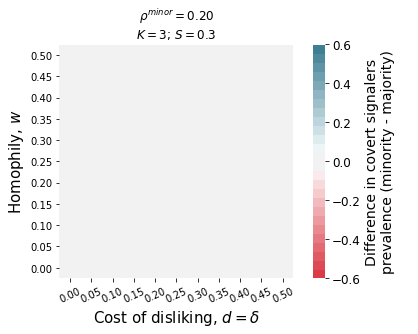

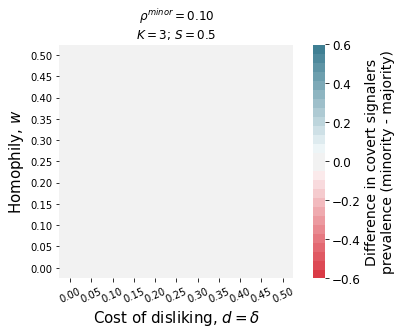

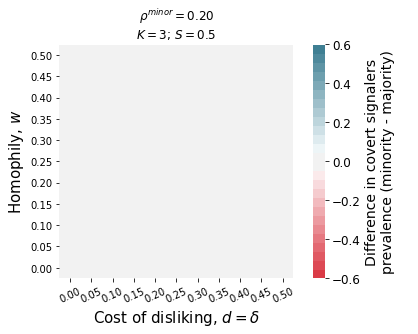

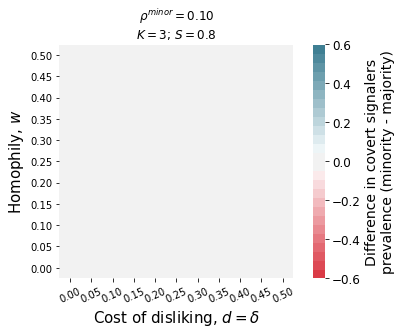

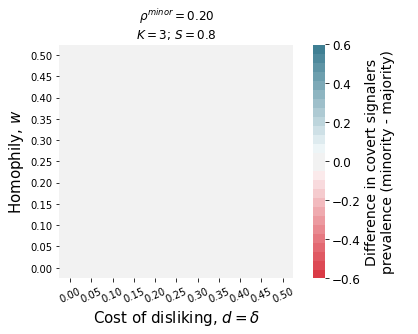

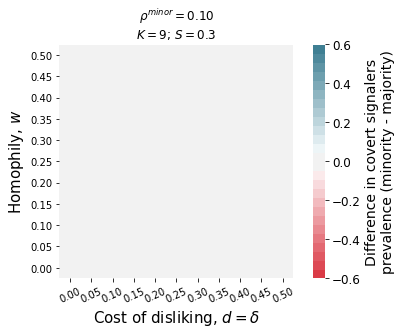

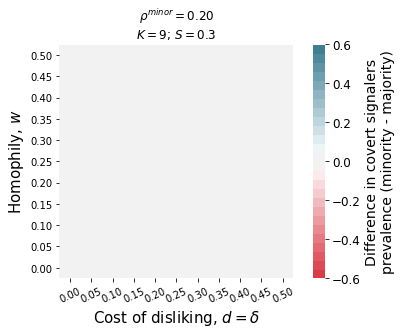

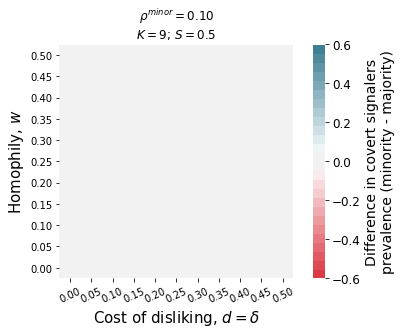

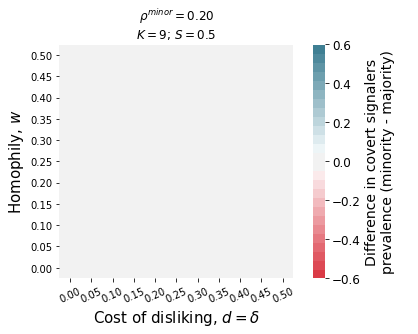

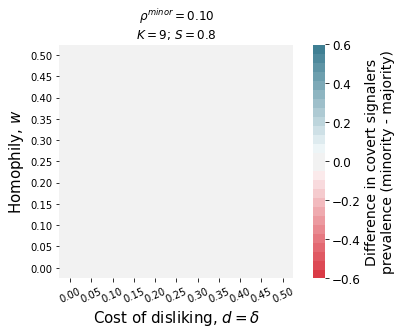

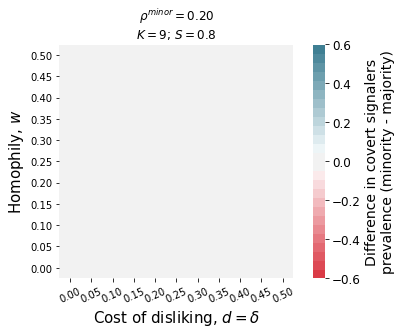

In [10]:
# Go through and make one figure for each where the filename
# indicates the parameters.
for b in blobs_to_load:
    df = b['df']
    K = b['K']
    rho_cov = b['minority_frac']
    S = b['S']
    title = f'$\\rho^{{minor}}={b["minority_frac"]}$\n$K={b["K"]}$; $S={b["S"]}$'
    savefig_path = \
    f'../../papers/idsig/Figures/minority_tolerance/{K}_{str(rho_cov).replace(".","p")}_{str(S).replace(".","p")}.pdf'
    minority_diff_heatmap(
        df,
        vmin=-0.6,
        vmax=0.6,
        title=title,
        savefig_path=savefig_path
    )

In [ ]:
## DIFFERS FROM ABOVE IN THAT NO VMIN/VMAX ARE SET 
## ---THIS MEANS THAT THE BELOW HEATMAPS ALL HAVE
## INSTANCE-SPECIFIC COLORMAPS.

# Go through and make one figure for each where the filename
# indicates the parameters.
for b in blobs_to_load:
    df = b['df']
    K = b['K']
    rho_cov = b['minority_frac']
    S = b['S']
    title = f'$\\rho^{{minor}}={b["minority_frac"]}$\n$K={b["K"]}$; $S={b["S"]}$'
    savefig_path = '../../papers/idsig/Figures/minority_tolerance/{K}_{rho_cov}_{S}.pdf'
    minority_diff_heatmap(
        df,
#         vmin=-0.6,
#         vmax=0.6,
        title=title,
        savefig_path=savefig_path
    )

Well that is not at all what we expected, and it doesn't match the previous work, so I am quite nervous about this result. The results are almost inverted. Were the previous results run to 500 time steps? Perhaps there were problems there. 

In [6]:
df = blobs_to_load[0]['df']
df.head()
df_end = df[df.timestep == 500]
print([(b['K'], b['S'], b['minority_frac']) for b in blobs_to_load])

[('3', '0.3', '0.10'), ('3', '0.3', '0.20'), ('3', '0.5', '0.10'), ('3', '0.5', '0.20'), ('3', '0.8', '0.10'), ('3', '0.8', '0.20'), ('9', '0.3', '0.10'), ('9', '0.3', '0.20'), ('9', '0.5', '0.10'), ('9', '0.5', '0.20'), ('9', '0.8', '0.10'), ('9', '0.8', '0.20')]


0.4205
0.436
0.05
0.1


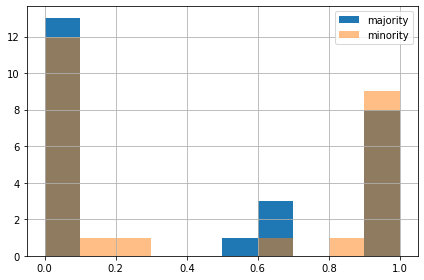

In [7]:
df = blobs_to_load[-3]['df']
df_end = df[df.timestep==500]
# print(df_end.disliking.unique())
# print(df_end.homophily.unique())
# print((df_end.disliking))
# print(df_end[np.isclose(df_end.disliking, 0.35)])
df_end_lim = df_end[np.isclose(df_end.disliking, 0.35) & 
                    np.isclose(df_end.homophily, 0.1)]
# print(df_end_lim.head())
df_end_lim.prop_covert_majority.hist(label='majority') 
df_end_lim.prop_covert_minority.hist(label='minority', alpha=0.5)
# df_end.prop_covert_minority.hist()

print(df_end_lim.prop_covert_majority.mean())
print(df_end_lim.prop_covert_minority.mean())

print(df_end_lim.prop_covert_majority.median())
print(df_end_lim.prop_covert_minority.median())

plt.legend()

I'm going to run the similarity analysis and see if that tells us anything.

# Tolerance/similarity analysis